In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import model_selection
import numpy as np


### Data

In [2]:
data = load_breast_cancer()
X=data.data
y=data.target

x_train, x_test, y_train, y_test =model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

### Solution applying KNN directly

In [3]:
clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
clf  = clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.93567251461988299

### Solution applying KNN with the PCA

In [4]:
x_train.shape

(398, 30)

In [62]:
# your code here
mu = np.mean(x_train, axis=0)

vaps, veps = np.linalg.eig(np.cov(x_train_mu.T))
idx = np.argsort(vaps)[::-1]

# Store eigenvectors in veps and eigenvalues in vaps. The projection matrix is P

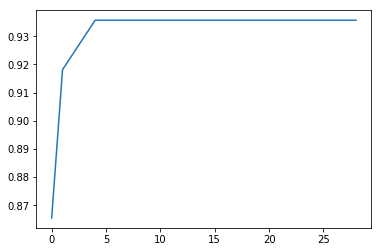

In [61]:
s = []
for i in range(1,veps.shape[1]):
    P = veps[:, idx[:i]]
    x_hat_train = np.dot(x_train,P)
    x_hat_test = np.dot(x_test,P)

    clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
    clf  = clf.fit(x_hat_train,y_train)

    s.append(clf.score(x_hat_test,y_test))
    
plt.plot(s)
plt.show()

Taking the five principal components we arrive to the optimal solution which is in fact the same obtained applying the KNN without using the PCA

In [66]:
P = veps[:, idx[:5]]


x_train_mu = x_train
x_hat_train = np.dot(x_train_mu,P)
x_test_mu = x_test
x_hat_test = np.dot(x_test_mu,P)

clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
clf  = clf.fit(x_hat_train,y_train)

clf.score(x_hat_test,y_test)

0.935672514619883


0.93567251461988299

### Solution applying KNN with the LDA

In [68]:
x_bar = np.mean(x_train,axis=0)
x_train_class_0 = x_train[np.where(y_train == 0)]
x_train_class_1 = x_train[np.where(y_train == 1)]

mu_0 = np.mean(x_train_class_0,axis=0)
mu_1 = np.mean(x_train_class_1,axis=0)

m0x = mu_0-x_bar
m1x = mu_1-x_bar
Sb = np.dot(m0x[:,np.newaxis],m0x[:,np.newaxis].T)+np.dot(m1x[:,np.newaxis],m1x[:,np.newaxis].T)

Sw = np.dot((x_train_class_0-mu_0).T,(x_train_class_0-mu_0)) + np.dot((x_train_class_1-mu_1).T,(x_train_class_1-mu_1))

In [69]:
A = np.dot(np.linalg.inv(Sw),Sb)
vaps,veps = np.linalg.eig(A)
idx = np.argsort(vaps)[::-1]

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


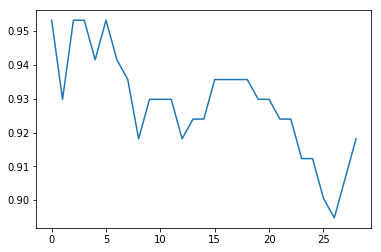

In [70]:
s = []
for i in range(1,veps.shape[1]):
    P = veps[:,idx[:i]]
    x_hat_train = np.dot(x_train,P)
    x_hat_test = np.dot(x_test,P)

    clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
    clf  = clf.fit(x_hat_train,y_train)

    s.append(clf.score(x_hat_test,y_test))
plt.plot(s)
plt.show()

In the plot, we  can see that just taking the component with maxim eigen value we arrive to the optimal solution which is better than those obtained by using PCA or only the KNN.

In [72]:
P = veps[:,:1]

x_train_mu = x_train
x_hat_train = np.dot(x_train_mu,P)
x_test_mu = x_test
x_hat_test = np.dot(x_test_mu,P)

clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
clf  = clf.fit(x_hat_train,y_train)

clf.score(x_hat_test,y_test)

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.95321637426900585